# Perspectieven

## Perspectief 1: Kwetsbare huishoudens en voedselprijzen

Sinds de COVID-19-pandemie zijn voedselprijzen in Zweden aanzienlijk gestegen. Deze stijging werd deels veroorzaakt door wereldwijde verstoringen in handelsketens, hogere transportkosten en fluctuaties in de energieprijzen. Vooral voor huishoudens met lage inkomens of een zwakke arbeidsmarktpositie zijn de gevolgen van deze prijsstijgingen voelbaar (Akter, 2020).

Hoewel Zweden bekendstaat als een welvarend land met een uitgebreid sociaal vangnet, is de inkomensongelijkheid sinds de jaren 2010 toegenomen, met name onder huishoudens met kinderen (Holmberg, 2024). Volgens Dietrich et al. (2021) kunnen pandemieën de voedselzekerheid bedreigen, vooral voor groepen die al kwetsbaar zijn. In Zweden wordt die kwetsbaarheid vaak zichtbaar bij alleenstaande ouders, gezinnen met migratieachtergrond of mensen met tijdelijke of deeltijdcontracten. Wanneer de prijzen van basisproducten als brood, melk en eieren stijgen terwijl inkomens achterblijven, ontstaan er risico’s op voedselonzekerheid, ook in een hoogontwikkeld land als Zweden.


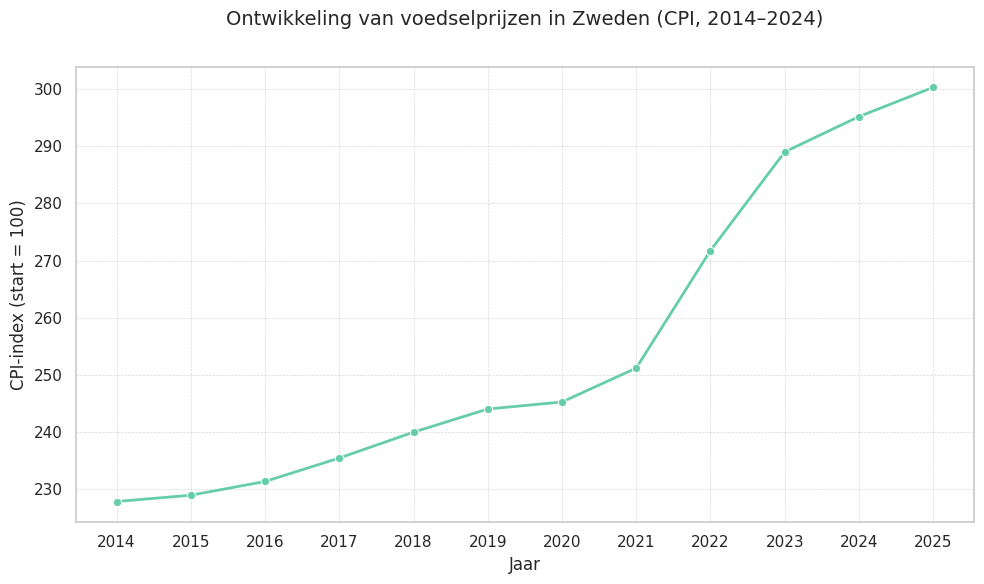

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("processed_data/CPI.csv")


df['month'] = pd.to_datetime(df['month'].str.replace('M', '-'), format='%Y-%m')
df = df.sort_values('month')


df['monthly_change'] = df['DATA']
df['cpi_index'] = 100.0
for i in range(1, len(df)):
    prev = df.loc[i-1, 'cpi_index']
    change = df.loc[i, 'monthly_change']
    df.loc[i, 'cpi_index'] = prev * (1 + change / 100)


df['year'] = df['month'].dt.year
yearly_cpi = df.groupby('year')['cpi_index'].mean().reset_index()


fig, ax = plt.subplots(figsize=(10, 6))


sns.lineplot(data=yearly_cpi, x='year', y='cpi_index',
             marker='o', linewidth=2, color='#66CDAA', ax=ax)


plt.title("Ontwikkeling van voedselprijzen in Zweden (CPI, 2014–2024)",
          fontsize=14, pad=30)
plt.xlabel("Jaar")
plt.ylabel("CPI-index (start = 100)")
plt.xticks(yearly_cpi['year'])


ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)


plt.subplots_adjust(top=0.88)
plt.tight_layout()

plt.show()


De grafiek toont de ontwikkeling van het CPI (consumer price index) tussen 2014 en 2024 voor Zweden. Met op de x-as de tijd is jaren en op de y-as de CPI-index. Om een duidelijker beeld te krijgen van de procentuele verandering is er als startwaarde 100 genomen.Van 2014 tot 2020 was er een geleidelijke stijging van voedselprijzen. Dit wijst op een redelijk stabiele markt.
Vanaf 2021 is er duidelijk een verandering te zien. De prijzen stijgen sneller dan ervoor. Deze grote stijging valt samen met de nasleep van COVID pandemie. De stekte stijging tussen 2021 en 2023 illusteert een belangrijke verandering van betaalbaarheid. 

Een analyse van de Consumer Price Index (SCB, 2025) laat zien dat de maandelijkse voedselprijsveranderingen na 2020 sterk zijn gestegen, vooral tijdens en vlak na de pandemie. Tegelijkertijd blijkt uit inkomensgegevens van Eurostat (2024) dat de netto-inkomens van deze groepen niet gelijke tred hielden met de inflatie. Hierdoor kunnen huishoudens minder kopen voor hetzelfde bedrag. Het probleem is dus een relatieve koopkrachtvermindering die leidt tot sociale uitsluiting en onzekerheid over de primaire levensbehoeften (Crawley & Theloudis, 2024).

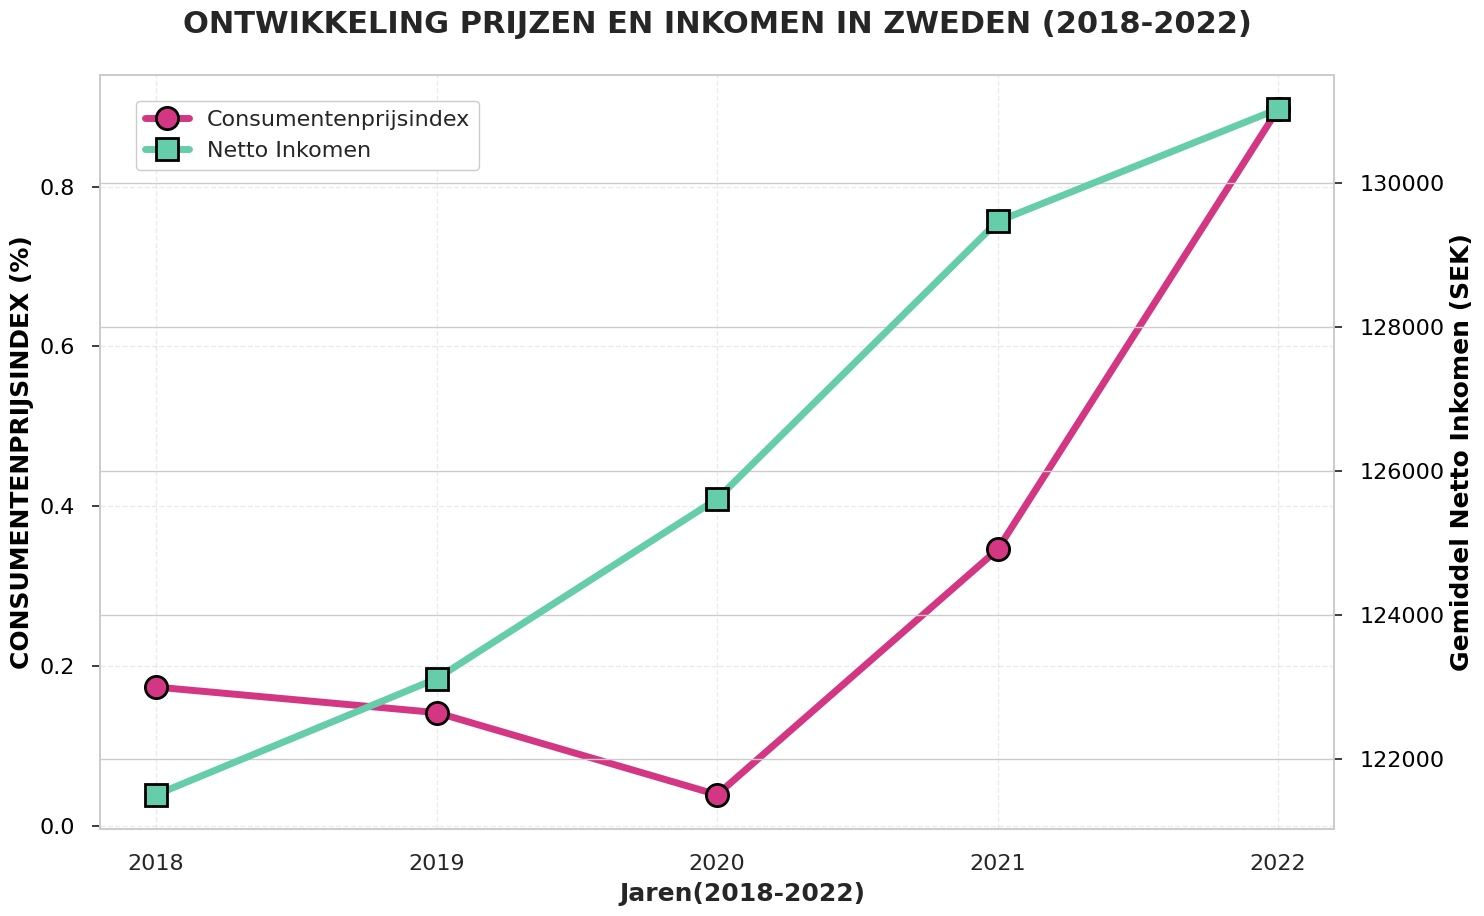

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Laad de verwerkte datasets
df_CPI = pd.read_csv('processed_data/CPI.csv')  
df_income = pd.read_csv('processed_data/Annual_Net_Earnings_Sweden_2014-2024.csv')

# Verwerk data
df_CPI['Year'] = df_CPI['month'].str.extract(r'(\d{4})').astype(int)
avg_cpi_per_year = df_CPI.groupby('Year')['DATA'].mean()
avg_income_per_year = df_income.groupby('TIME_PERIOD')['OBS_VALUE'].mean()

# Filter voor 2018-2022
years_range = range(2018, 2023)
avg_cpi_per_year = avg_cpi_per_year[avg_cpi_per_year.index.isin(years_range)]
avg_income_per_year = avg_income_per_year[avg_income_per_year.index.isin(years_range)]

# Maak de visualisatie
plt.figure(figsize=(15, 9))

# CPI (rode lijn)
ax1 = plt.gca()
color = '#d33682'
ax1.set_xlabel('', fontsize=0)  # Verwijder x-as label
ax1.set_ylabel('CONSUMENTENPRIJSINDEX (%)', 
              color='black', fontsize=18, fontweight='bold', linespacing=1.8)
price_line = ax1.plot(avg_cpi_per_year.index, avg_cpi_per_year.values, 
                     'o-', color=color, linewidth=5, markersize=16,
                     markeredgecolor='black', markeredgewidth=2, 
                     label='Consumentenprijsindex')[0]

# Grotere tick labels
ax1.tick_params(axis='y', labelcolor='black', labelsize=16, pad=12)
ax1.set_xticks(list(years_range))
ax1.tick_params(axis='x', labelsize=16, pad=12)

# Netto inkomen (blauwe lijn)
ax2 = ax1.twinx()
color = '#66CDAA'
ax2.set_ylabel('Gemiddel Netto Inkomen (SEK)', 
              color='black', fontsize=18, fontweight='bold', linespacing=1.8)
income_line = ax2.plot(avg_income_per_year.index, avg_income_per_year.values, 
                      's-', color=color, linewidth=5, markersize=16,
                      markeredgecolor='black', markeredgewidth=2, 
                      label='Netto Inkomen')[0]
ax2.tick_params(axis='y', labelcolor='black', labelsize=16, pad=12)

# Titel
plt.title('ONTWIKKELING PRIJZEN EN INKOMEN IN ZWEDEN (2018-2022)', 
          fontsize=22, pad=30, fontweight='bold')

# Legenda
lines = [price_line, income_line]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left', fontsize=16, 
           bbox_to_anchor=(0.02, 0.98), framealpha=1)

# Grid en layout
ax1.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

# Voeg JAAR label toe onder de x-as
plt.figtext(0.5, -0.01, 'Jaren(2018-2022)', ha='center', fontsize=18, fontweight='bold')

plt.show()

De figuur toont de ontwikkeling van de consumentenprijsindex (CPI) en het gemiddelde netto inkomen in Zweden over de periode van 2018 tot en met 2022. Met op de x-as de tijd is jaren en op de y-as de consumentenprijsindex in percentages. Uit de grafiek blijkt dat de CPI tussen 2018 en 2020 licht is gedaald, wat duidt op een periode van stabiele of zelfs iets lagere prijzen. Vanaf 2020 is echter een duidelijke stijging te zien: in 2021 neemt de CPI weer toe, en deze stijging zet door in 2022.

Het gemiddelde netto inkomen laat over dezelfde periode een gestage stijging zien. Jaar na jaar neemt het inkomen iets toe, zonder sterke schommelingen. In 2022 liggen de CPI en het gemiddelde netto inkomen op visueel vergelijkbare niveaus, wat suggereert dat de prijzen en inkomens zich tegen het einde van de periode naar elkaar toe bewegen.

Het omslagpunt in 2020 is opvallen, want waar de eerste drie jaar een combinatie van stijgende inkomens en stabiele prijzen te zien is, verandert het beeld na 2020 door de hernieuwde prijsstijging. Deze ontwikkeling wijst op een veranderende economische situatie waarin de verhouding tussen prijs- en inkomensgroei opnieuw in balans moet worden gebracht.

### Argumenten perspectief 1:

- Voedselprijzen zijn sterker gestegen dan inkomens voor kwetsbare groepen (SCB, 2025; Eurostat, 2024).
- Economische verstoringen versterken al bestaande ongelijkheden (Dietrich et al., 2021).
- Inkomensondersteuning blijft achter bij structurele prijsveranderingen (Holmberg, 2024).


## Perspectief 2: Inkomensgroei en economische stabiliteit

Een ander perspectief stelt dat Zweden zich economisch relatief goed heeft weten te handhaven, zelfs tijdens crisissituaties zoals COVID-19. Statistieken van de World Bank (2024) en Eurostat (2024) tonen aan dat het gemiddelde netto-inkomen in Zweden over de afgelopen tien jaar een gestage groei heeft doorgemaakt. In combinatie met een relatief hoge arbeidsparticipatiegraad en lage werkloosheid suggereert dit dat veel huishoudens wel de middelen hebben om stijgende voedselprijzen op te vangen.

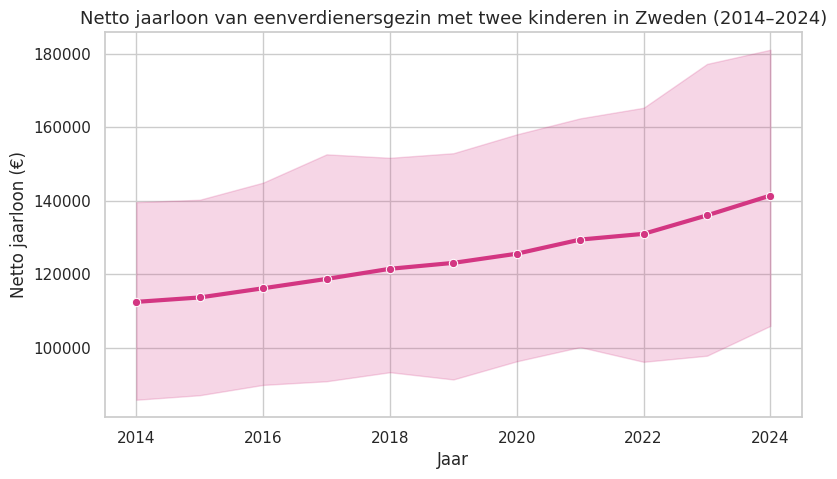

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ------------------------------------------
# DATA INLADEN
# ------------------------------------------


# Lees netto jaarloon in
earnings_df = pd.read_csv('processed_data/Annual_Net_Earnings_Sweden_2014-2024.csv')


# ------------------------------------------
# PREPROCESSING NETTO JAARLOON (2014–2024)
# ------------------------------------------


earnings_df.rename(columns={
   'TIME_PERIOD': 'Jaar',
   'OBS_VALUE': 'Netto_Jaarloon'
}, inplace=True)


earnings_df = earnings_df[(earnings_df['Jaar'] >= 2014) & (earnings_df['Jaar'] <= 2024)]


# ------------------------------------------
# GRAFIEK – NETTO JAARLOON
# ------------------------------------------


sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(9, 5))
sns.lineplot(
   data=earnings_df,
   x="Jaar",
   y="Netto_Jaarloon",
   marker='o',
   linewidth=3,
   color="#d33682"  
)
plt.title("Netto jaarloon van eenverdienersgezin met twee kinderen in Zweden (2014–2024)", fontsize=13)
plt.ylabel("Netto jaarloon (€)")
plt.xlabel("Jaar")
plt.grid(True)
plt.show()

Deze grafiek toont het netto jaarloon van een eenverdienersgezin met twee kinderen in zweden tussen 2014 en 2024. De x-as geeft de tijd is jaren weer en de y-as het netto jaarloon in euro's. De donkergroene lijn geeft het gemiddelde aan en het lichtgroene gebied geeft het minimale en maximale netto jaarloon aan. Er zijn geen heftige dalingen of schommelingen te zien,    zelfs tijdens de pandemie jaren. Het gemiddeld netto inkomen voor dit type huishouden is dus stabiel gebleven.

Bovendien is het Zweedse fiscale systeem progressief: hogere inkomens dragen meer belasting af en er bestaan toeslagen voor gezinnen met kinderen (Holmberg, 2024). Deze combinatie van inkomensgroei en herverdeling zorgt ervoor dat de gemiddelde Zweedse consument vandaag meer netto te besteden heeft dan tien jaar geleden, ondanks dat er inflatie heeft plaatsgevonden

Daarbij moet worden opgemerkt dat de consumptieve bestedingen in Zweden sinds 2021 opnieuw zijn toegenomen, wat wijst op een herstel van het vertrouwen in de economie (World Bank, 2024). Volgens Crawley en Theloudis (2024) is het verschil in koopkracht vaak eerder een kwestie van verdeling dan van absolute afname. Dat betekent dat de gemiddelde consument zich nog steeds voedselprijzen kan veroorloven, maar dat sommige groepen achterblijven.

In [5]:
import plotly.graph_objects as go
import numpy as np

# Filter data (ga ervan uit dat OBS_VALUE al in SEK is)
df_filtered = df_income[df_income['TIME_PERIOD'].between(2018, 2022)]

# Y-as instellingen in SEK
y_tickvals = [100, 5000, 10000, 25000, 50000, 75000, 100000, 
              250000, 500000, 750000, 1000000, 1500000]
y_ticktext = ['0', '5k', '10k', '25k', '50k', '75k', '100k', 
              '250k', '500k', '750k', '1M', '1.5M']

# Figuur maken
fig4 = go.Figure()

for year in sorted(df_filtered['TIME_PERIOD'].unique()):
    df_year = df_filtered[df_filtered['TIME_PERIOD'] == year]
    y_values = np.where(df_year['OBS_VALUE'] == 0, 100, df_year['OBS_VALUE'])
    fig4.add_trace(go.Box(
        y=y_values,
        name='',
        visible=(year == 2022),
        boxpoints=False,
        marker_color='#59A14F',
        line_color='#d33682',
        width=0.5,
        hoverinfo='y',
        hovertemplate='%{y:,.2f} kr<extra></extra>'  # Tooltip met SEK
    ))

# Layout met Nederlandse labels
fig4.update_layout(
    title=dict(
        text="<b>Inkomensverdeling</b>",  # Nederlandse titel
        x=0.05,
        xanchor='left',
        y=0.95,
        font=dict(size=18, family='Arial')
    ),
    yaxis=dict(
        title='Netto inkomen (SEK)',
        tickvals=y_tickvals,
        ticktext=y_ticktext,
        type='log',
        range=[np.log10(50), np.log10(2000000)],
        gridcolor='rgba(200,200,200,0.3)',
        zeroline=False,
        title_font=dict(size=14)
    ),
    xaxis=dict(
        showticklabels=False,
        showgrid=False,
        range=[-0.5, 0.5]
    ),
    updatemenus=[{
        "buttons": [dict(label=str(year),
                      method="update",
                      args=[{"visible": [y==year for y in sorted(df_filtered['TIME_PERIOD'].unique())]}])
                 for year in sorted(df_filtered['TIME_PERIOD'].unique())],
        "direction": "down",
        "x": 0.5,
        "y": 1.15,
        "xanchor": "center",
        "yanchor": "top",
        "bgcolor": "rgba(255,255,255,0.8)"
    }],
    height=650,
    margin=dict(l=80, r=80, t=120, b=80),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Nul-weergave
fig4.add_annotation(
    x=-0.5, y=100, xref='x', yref='y',
    text='0', showarrow=False,
    font=dict(color='black'),
    xanchor='right'
)

fig4.show()

Deze grafiek toont hoe inkomens verdeeld waren onder Zweden van 2018 tot 2022. De box geeft aan wat het inkomen van de meeste mensen was, de dikke lijn in het midden is het gemiddelde. De lijntjes boven en onder het vak laten de maximaal en de minimaal zien. Omdat sommigen veel meer verdienden dan anderen, gebruiken we een speciale schaal zodat je alle verschillen goed kunt zien. En met het keuzemenu bovenaan kan je verschillende jaren selecteren.
Uit de grafiek blijkt dat het gimddeld inkomen toe is genomen in de periode 2018 tot 2021. Maar de gemiddelde daalt in 2022.

### Argumenten perspectief 2:

- Gemiddeld netto-inkomen is gestegen over 2014–2024 (Eurostat, 2024).
- De economie herstelde zich na COVID-19 sneller dan verwacht (World Bank, 2024).
- Huidige ongelijkheid gaat meer over verdeling dan over absolute inkomens (Crawley & Theloudis, 2024).
